**Mathematical Foundations for Computer Vision and Machine Learning**

***Assignment09 - Binary Classifier(Zero Classifier)***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment09)

# Setting Up

We should get ready to read mnist files. 

**Careful! It's really huge!** You should have enough free memory.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Functions

Theres some funtions implemented below.

We should normalize the input data to get rid of bias.

We are implementing binary classifier, so if label is 0, it is the answer. Otherwise, it isn't.

In [3]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# return 1 only if the value is what we are looking for. Otherwise -1.
#
def bi_partitioning(M,val):
    length = len(M)
    res = np.zeros((length))
    for i in range(length):
        if(M[i] == val):
            res[i] = 1
        else:
            res[i] = -1
    return res

#
# sign funtion
#
def sign(x):
    if(x>=0):
        return 1
    else:
        return -1
    

# Vectorize the Input Data

We should get first element of MNIST data to get label.

The real image data starts from second element.

In [4]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)
list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector   

    count += 1
    
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Feature Function

We define a feature function ```featureOf``` with varying ```p```. 

$$ \theta_{1}f_{1}(x_{1}) + \theta_{2}f_{2}(x_{1}) + \cdots + \theta_{p}f_{p}(x_{1}) = y_{1} $$
$$ \theta_{1}f_{1}(x_{2}) + \theta_{2}f_{2}(x_{2}) + \cdots + \theta_{p}f_{p}(x_{2}) = y_{2} $$
$$ \theta_{1}f_{1}(x_{3}) + \theta_{2}f_{2}(x_{3}) + \cdots + \theta_{p}f_{p}(x_{3}) = y_{3} $$
$$ \vdots $$
$$ \theta_{1}f_{1}(x_{n}) + \theta_{2}f_{2}(x_{n}) + \cdots + \theta_{p}f_{p}(x_{1}) = y_{n} $$

We can write this as matmul.
$$ \begin{pmatrix} f_{1}(x_{1}) & \cdots & f_{p}(x_{1}) \\ \vdots &\ddots & \vdots \\ f_{1}(x_{n}) & \cdots & f_{p}(x_{n}) \end{pmatrix} 
\begin{pmatrix} \theta_{1} \\ \vdots \\ \theta_{p} \end{pmatrix} 
= \begin{pmatrix} y_{1} \\ \vdots \\ y_{n}  \end{pmatrix}$$

Let's say that left tall matrix as ```A```. Then,
$$ A =  \begin{pmatrix} f_{1}(x_{1}) & \cdots & f_{p}(x_{1}) \\ \vdots &\ddots & \vdots \\ f_{1}(x_{n}) & \cdots & f_{p}(x_{n}) \end{pmatrix} = \begin{pmatrix} r_{1}^{T}x_{1} & \cdots & r_{p}^{T}x_{1} \\ \vdots &\ddots & \vdots \\ r_{1}^{T}x_{n} & \cdots & r_{p}^{T}x_{n} \end{pmatrix} = \begin{pmatrix}\begin{pmatrix} r_{1}^{T} \\ \vdots \\ r_{p}^{T}\end{pmatrix} \begin{pmatrix}x_{1}  \cdots x_{n}\end{pmatrix}\end{pmatrix}^{T}$$

We can easily implement this feature funtion by using ```R``` where,

$$ R =  \begin{pmatrix} r_{1}^{T} \\ \vdots \\ r_{p}^{T}\end{pmatrix}$$

We can derive theta from equation above by pseudo inverse.
$$ \theta = \left( A^{T}A\right)^{-1}A^{T}B $$

In [30]:
R = np.zeros((size_row*size_col,size_row*size_col))
for i in range(size_row*size_col):
    R[i] = np.random.normal(0,1,size=size_row*size_col)
print(R)


def featureOf(x, p):
    r=np.zeros((size_row*size_col,size_row*size_col))
    for i in range(p):
        r[i] = R[i]
    return np.dot(r,x)



[[ 0.06209322  1.69742221  0.93905718 ...  0.85790117 -1.1091334
   1.88575297]
 [-0.01382504 -0.87095544  0.39818214 ...  0.76803312 -0.54626269
  -0.00873051]
 [ 1.48064805 -0.19944027 -0.30861911 ... -1.08976679 -0.43483775
   1.06988384]
 ...
 [ 1.22328131 -1.53053215  0.61355726 ...  1.63483972 -1.21843046
   0.60292559]
 [-2.2363228  -0.59812129 -0.44962861 ... -0.35739552  1.42024426
   0.48127517]
 [ 0.18784073 -0.32321428 -0.18496259 ... -0.21928588  1.10832017
   0.48382031]]


# To make it Linearly Indepent

We should erase **zero column** from the input data. This makes Matrix A as **dependent**, which makes impossible to get **pseudo inverse**.

This means that in theta, the **ith value** is **0**. 

$$\theta = [\theta_{1} \theta_{2} \cdots \theta_{784}]$$

$$\theta_{i} = 0$$

We get the **F1 score** of every p between 100~784.

And set index of maximum F1 score as variable m.

In [47]:
scores = np.zeros(10)
B = np.matrix(np.transpose(bi_partitioning(list_label_train,0)))   # (60000, 1)
B_hat = bi_partitioning(list_label_test,0)

for j in range(10):
    p = 2**j
    feature = featureOf(list_image_train, p)

    index = np.where(~feature.any(axis=1))[0]
    A = feature[~np.all(feature == 0, axis=1)]
    A = np.matrix(np.transpose(A))

    temp_theta = (A.T * A).I*A.T*B.T
    
    theta = np.zeros((size_col*size_row))
    count = 0
    for i in range(size_col*size_row):
        if i not in index:
            theta[i]=temp_theta[count]
            count+=1
            
    table = np.zeros((2,2))

    #im_avg = np.zeros((size_row*size_col,4))
    
    feature = featureOf(list_image_test, p)
    for i in range(num_test):
        if sign(theta.dot(feature[:,i])) == 1:
            if(B_hat[i] == 1):
                # True Positive
                table[0][0] += 1
                #im_avg[:,0] += list_image_test[:,i]
            else:
                # False Positive
                table[1][0] += 1
                #im_avg[:,1] += list_image_test[:,i]
        else:
            if(B_hat[i] == 1):
                # False Negative
                table[0][1] += 1
                #im_avg[:,3] += list_image_test[:,i]
            else:
                # True Negative
                table[1][1] += 1
                #im_avg[:,2] += list_image_test[:,i]
#     data = {
#         'y_hat = +1' : [table[0][0],table[1][0],sum(table[:,0])],
#         'y_hat = -1' : [table[0][1],table[1][1],sum(table[:,1])],
#         'Total' : [sum(table[0]),sum(table[1]), sum(sum(table))] 
#     }
#     frame = DataFrame(data,columns = ['y_hat = +1','y_hat = -1','Total'], index = ['y = +1','y = -1','All'])
#     display(frame)
    prec = table[0][0]/(table[0][0]+table[1][0])
    rec = table[0][0]/(table[0][0] + table[0][1])
    F1 = 2*(prec*rec/(prec+rec))
    
 
    
    scores[j] = F1
    print(str(j) + " " + str(prec) + " " + str(rec) + " " + str(F1))


0 0.20144144144144144 0.5704081632653061 0.2977363515312916
1 0.3291139240506329 0.8755102040816326 0.4783942012824086
2 0.5494117647058824 0.47653061224489796 0.5103825136612022
3 0.6935866983372921 0.5959183673469388 0.6410537870472008
4 0.7749419953596288 0.6816326530612244 0.7252985884907709
5 0.8195232690124858 0.736734693877551 0.7759269210102095
6 0.895855472901169 0.860204081632653 0.8776678813118167
7 0.9331919406150583 0.8979591836734694 0.9152366094643786
8 0.9393939393939394 0.9173469387755102 0.9282395456892102
9 0.9422680412371134 0.9326530612244898 0.9374358974358974


In [51]:
print("Best p = " + str(2**np.argmax(scores)))
print(max(scores))

m = 2**np.argmax(scores)

Best p = 512
0.9374358974358974


# Average Image of Each Table Value

While classifing data, I also calculated average image of each TP,FP, TN, and FN.

Average image of each one is plotted.

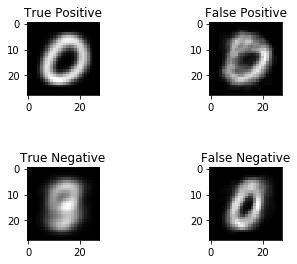

In [54]:
feature = featureOf(list_image_train, m)
index = np.where(~feature.any(axis=1))[0]
A = feature[~np.all(feature == 0, axis=1)]
A = np.matrix(np.transpose(A))
B = np.matrix(np.transpose(bi_partitioning(list_label_train,0)))   # (60000, 1)
# print(A)
temp_theta = (A.T * A).I*A.T*B.T
theta = np.zeros((size_col*size_row))
count = 0
for i in range(size_col*size_row):
    if i not in index:
        theta[i]=temp_theta[count]
        count+=1
table = np.zeros((2,2))

im_avg = np.zeros((size_row*size_col,4))
feature = featureOf(list_image_test, m)
for i in range(num_test):
    if sign(theta.dot(feature[:,i])) == 1:
        if(B_hat[i] == 1):
            # True Positive
            table[0][0] += 1
            im_avg[:,0] += list_image_test[:,i]
        else:
            # False Positive
            table[1][0] += 1
            im_avg[:,1] += list_image_test[:,i]
    else:
        if(B_hat[i] == 1):
            # False Negative
            table[0][1] += 1
            im_avg[:,3] += list_image_test[:,i]
        else:
            # True Negative
            table[1][1] += 1
            im_avg[:,2] += list_image_test[:,i]


im_avg[:,0] /= table[0][0]
im_avg[:,1] /= table[1][0]
im_avg[:,2] /= table[1][1]
im_avg[:,3] /= table[0][1]

p1 = plt.subplot(2,2,1)
p1.imshow(im_avg[:,0].reshape((size_row, size_col)),cmap='gray')
p1.set_title("True Positive")
p2 = plt.subplot(2,2,2)
p2.imshow(im_avg[:,1].reshape((size_row, size_col)),cmap='gray')
p2.set_title("False Positive")
p3 = plt.subplot(2,2,3)
p3.imshow(im_avg[:,2].reshape((size_row, size_col)),cmap='gray')
p3.set_title("True Negative")
p4 = plt.subplot(2,2,4)
p4.imshow(im_avg[:,3].reshape((size_row, size_col)),cmap='gray')
p4.set_title("False Negative")
plt.subplots_adjust(hspace=1)